In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

**DATA ANALYSIS**

In [64]:
df = pd.read_csv('/content/drive/MyDrive/ClauseClassification - ClauseClassification.csv' , names=["Traning set","classes"], na_values=" NaN")
df.head()

,Traning set,classes
0,The Borrower and certain lenders and agents ar...,Other
1,This CREDIT AGREEMENT is entered into as of No...,Preamble
2,This agreement is dated 22 December 2014 and m...,Preamble
3,This Agreement and shall be governed by and in...,Governing Law
4,The choice of South African law as the governi...,Governing Law


In [65]:
train = df.iloc[:11]
test = df.iloc[11:]

In [66]:
df_new = pd.read_csv('/content/drive/MyDrive/TextClassification_test - Sheet1.csv' , names=["Traning set","classes"], na_values=" NaN")

In [67]:
unlabeled=df_new

In [68]:
X_train = train.drop('classes', axis=1)
y_train = train.classes

X_unlabeled = unlabeled.drop('classes', axis=1)

X_test = test.drop('classes', axis=1)
y_test = test.classes


# Check dimensions of data after splitting

print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}\n")

print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}\n")

print(f"X_unlabeled dimensions: {X_unlabeled.shape}")

X_train dimensions: (11, 1)
y_train dimensions: (11,)

X_test dimensions: (16, 1)
y_test dimensions: (16,)

X_unlabeled dimensions: (10, 1)


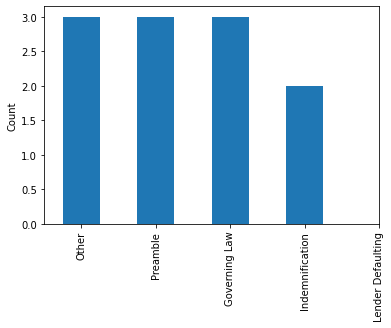

In [69]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1,2,3,4], ['Other', 'Preamble','Governing Law','Indemnification','Lender Defaulting'])
plt.ylabel('Count');

In [70]:
y_train

0               Other
1            Preamble
2            Preamble
3       Governing Law
4       Governing Law
5       Governing Law
6               Other
7               Other
8     Indemnification
9     Indemnification
10    Indemnification
Name: classes, dtype: object

**DATA CLEANING**

In [71]:
import nltk                               
nltk.download('stopwords')
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords 
import nltk.tokenize
nltk.download('punkt')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


REMOVE STOP-WORDS

In [72]:
def remove_stopwords(x):
  x=word_tokenize(x)
  stopwords_all = stopwords.words('english')
  x = " ".join(i for i in x if not(i in stopwords_all))
  return x


In [73]:
X_train['Traning set']=X_train['Traning set'].apply(remove_stopwords)
X_test['Traning set']=X_test['Traning set'].apply(remove_stopwords)
X_unlabeled['Traning set']=X_unlabeled['Traning set'].apply(remove_stopwords)

In [74]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


REMOVE NUMBERS

In [75]:
def number_removal(row):
    data1 = row['Traning set']
    if type(data1) not in [int,float]:
        line = re.sub(r"[^A-Za-z\s]", " ", data1.strip())
        tokens = line.split()
    else:
        tokens=[]
    return ' '.join(tokens)
frequency_words_wo_stop = {}
def generate_word_frequency(row):
    data1 = row['Traning set']
    tokens = nltk.wordpunct_tokenize(data1)
    token_list = []
    for token in tokens:
        token_list.append(token.lower())
        if token.lower() in frequency_words_wo_stop:
            count = frequency_words_wo_stop[token.lower()]
            count = count + 1
            frequency_words_wo_stop[token.lower()] = count
        else:
            frequency_words_wo_stop[token.lower()] = 1
    return ','.join(token_list)

LEMMATIZATION OF LINES

In [76]:
wordnet_lemmatizer = WordNetLemmatizer()

def receieve(query):
    data1=query
    data1['Traning set'] = data1.apply(number_removal,axis=1)
    data1['tokens'] = data1.apply(generate_word_frequency,axis=1)
    # print (data1.head())
    big=[]
    for i in data1['tokens']:
        st=''
        ls=[]
        for j in i.split(','):
            # print (wordnet_lemmatizer.lemmatize(j))
            ls.append(wordnet_lemmatizer.lemmatize(j))
        big.append(' '.join(ls))
    data1['Traning set_lem']=big
    return data1['Traning set_lem']
X_test['Traning set']=receieve(X_test[['Traning set']])
X_train['Traning set']=receieve(X_train[['Traning set']])
X_unlabeled['Traning set']=receieve(X_unlabeled[['Traning set']])


In [77]:
X_test=X_test['Traning set'].tolist()
X_train=X_train['Traning set'].tolist()
X_unlabeled =X_unlabeled['Traning set'].tolist()
y_train =y_train.tolist()
y_test = y_test.tolist()

In [78]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [79]:
vectorizer = CountVectorizer()
vectorizer.fit(X_unlabeled)

train_mat_ul = vectorizer.transform(X_unlabeled)
print (train_mat_ul.shape)

train_mat = vectorizer.transform(X_train)
print (train_mat.shape)
test_mat = vectorizer.transform(X_test)
print (test_mat.shape)

(10, 151)
(11, 151)
(16, 151)


In [80]:
tfidf = TfidfTransformer()
tfidf.fit(train_mat_ul)

train_tfmat = tfidf.transform(train_mat)
print (train_tfmat.shape)

# train_tfmat_ul = tfidf.transform(train_mat_ul)
# print (train_tfmat_ul.shape)

test_tfmat = tfidf.transform(test_mat)
print (test_tfmat.shape)

(11, 151)
(16, 151)


In [81]:
unlabel_tfmat = tfidf.transform(train_mat_ul)
print (train_mat_ul.shape)

(10, 151)


**TRAINING & TESTING OF MODEL**

In [82]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

Plotting confusion matrix for labels

In [83]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [84]:
import itertools

Train f1 Score: [1.         1.         0.85714286 0.66666667]
Test f1 Score: [1.         1.         0.         0.42857143 0.        ]
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 0 5 0]
 [0 0 0 3 0]
 [0 0 0 3 0]]


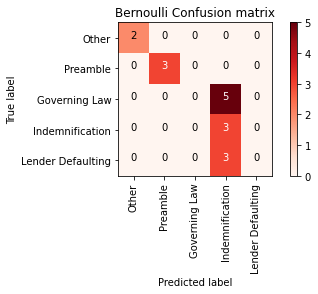

In [85]:
clf = BernoulliNB()
clf.fit(train_tfmat, y_train)
y_hat_test = clf.predict(test_tfmat)
y_hat_train = clf.predict(train_tfmat)

train_f1 = f1_score(y_train, y_hat_train,average=None)
test_f1 = f1_score(y_test, y_hat_test,average=None)

print(f"Train f1 Score: {train_f1}")
print(f"Test f1 Score: {test_f1}")

plot_confusion_matrix(confusion_matrix(y_test, y_hat_test), classes=['Other', 'Preamble','Governing Law','Indemnification','Lender Defaulting'],  title='Bernoulli Confusion matrix')
plt.show()

In [86]:
y_hat_test = clf.predict(test_tfmat)
y_hat_train = clf.predict(train_tfmat)
print(f"Test Score: {accuracy_score(y_test, y_hat_test)}")
print(f"Train Score: {accuracy_score(y_train, y_hat_train)}")

Test Score: 0.5
Train Score: 0.9090909090909091


In [87]:
X_train=pd.DataFrame(train_tfmat.toarray())
X_test=pd.DataFrame(test_tfmat.toarray())

In [88]:
X_unlabeled=pd.DataFrame(unlabel_tfmat.toarray())

In [89]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)


**SEMI SUPERVISED LEARNING ALGORITHM**

In [90]:
# Initiate iteration counter
iterations = 0

# Containers to hold f1_scores and # of pseudo-labels
train_f1s = []
test_f1s = []
pseudo_labels = []

# Assign value to initiate while loop
high_prob = [1] 

# Loop will run until there are no more high-probability pseudo-labels
while len(high_prob) > 0:
    clf.fit(X_train, y_train[list(y_train)[0]].tolist())
    y_hat_train = clf.predict(X_train)
    y_hat_test = clf.predict(X_test)

    # Calculate and print iteration # and f1 scores, and store f1 scores
    train_f1 = accuracy_score(y_train[list(y_train)[0]].tolist(), y_hat_train)
    test_f1 = accuracy_score(y_test[list(y_test)[0]].tolist(), y_hat_test)
    print(f"Iteration {iterations}")
    print(f"Train : {train_f1}")
    print(f"Test : {test_f1}")
    train_f1s.append(train_f1)
    test_f1s.append(test_f1)
   
    # Generate predictions and probabilities for unlabeled data
    print(f"Now predicting labels for unlabeled data...")

    pred_probs = clf.predict_proba(X_unlabeled)
    preds = clf.predict(X_unlabeled)
    prob_0 = pred_probs[:,0]
    prob_1 = pred_probs[:,1]
    prob_2=pred_probs[:,2]
    prob_3=pred_probs[:,3]
    # prob_4=pred_probs[:,4]

    # Store predictions and probabilities in dataframe
    df_pred_prob = pd.DataFrame([])
    df_pred_prob['preds'] = preds
    df_pred_prob['prob_0'] = prob_0
    df_pred_prob['prob_1'] = prob_1
    df_pred_prob['prob_2'] = prob_2
    df_pred_prob['prob_3'] = prob_3
    # df_pred_prob['prob_4'] = prob_4
    df_pred_prob.index = X_unlabeled.index
    
    # Separate predictions with > 99% probability
    high_prob = pd.concat([df_pred_prob.loc[df_pred_prob['prob_0'] > 0.99],df_pred_prob.loc[df_pred_prob['prob_1'] > 0.99],df_pred_prob.loc[df_pred_prob['prob_2'] > 0.99],df_pred_prob.loc[df_pred_prob['prob_3'] > 0.99]],axis=0)
    
    print(f"{len(high_prob)} high-probability predictions added to training data.")
    
    pseudo_labels.append(len(high_prob))

    # Add pseudo-labeled data to training data
    X_train = pd.concat([X_train, X_unlabeled.loc[high_prob.index]], axis=0)
    y_train = pd.concat([y_train, high_prob.preds])      
    
    # Drop pseudo-labeled instances from unlabeled data
    X_unlabeled = X_unlabeled.drop(index=high_prob.index)
    print(f"{len(X_unlabeled)} unlabeled instances remaining.\n")
    
    # Update iteration counter
    iterations += 1

Iteration 0
Train : 0.9090909090909091
Test : 0.5
Now predicting labels for unlabeled data...
4 high-probability predictions added to training data.
6 unlabeled instances remaining.

Iteration 1
Train : 0.9333333333333333
Test : 0.375
Now predicting labels for unlabeled data...
1 high-probability predictions added to training data.
5 unlabeled instances remaining.

Iteration 2
Train : 0.8125
Test : 0.3125
Now predicting labels for unlabeled data...
0 high-probability predictions added to training data.
5 unlabeled instances remaining.



In [91]:
X_unlabeled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,0.172999,0.130816,0.345997,0.155363,0.0,0.392448,0.130816,0.130816,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.097292,0.000000,0.130816,0.00000,0.130816,0.0,0.0,0.0,0.261632,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.261632,0.00000,0.00000,0.000000,0.130816,0.00000,0.0,0.0,0.130816,0.000000,0.0,0.130816,0.0,0.000000,0.222411,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.200108,0.000000,0.200108,0.000000,0.0,0.000000,0.000000,0.000000,0.151315,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.112538,0.302631,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.151315,0.151315,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.128632,...,0.000000,0.0,0.000000,0.151315,0.00000,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.151315,0.151315,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.151315,0.000000,0.0,0.151315,0.0,0.302631,0.151315,0.151315,0.0
6,0.0,0.0,0.178426,0.000000,0.178426,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.269839,0.000000,0.000000,0.000000,0.000000,0.13492,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.269839,0.0,0.0,0.0,0.000000,...,0.539679,0.0,0.000000,0.000000,0.13492,0.000000,0.0,0.13492,0.13492,0.0,0.0,0.0,0.0,0.0,0.13492,0.000000,0.000000,0.0,0.000000,0.13492,0.13492,0.089213,0.000000,0.13492,0.0,0.0,0.000000,0.269839,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.542544,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
9,0.0,0.0,0.000000,0.000000,0.000000,0.125561,0.0,0.000000,0.000000,0.000000,0.000000,0.179748,0.211446,0.0,0.0,0.0,0.0,0.000000,0.211446,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.211446,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.211446,0.000000,0.00000,0.422892,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.00000,0.00000,0.139814,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


Only 5 lines could not labelled by the model

Although the accuracy is low, the model has confidence in the labels it has predicted

In [92]:
Result = clf.predict(unlabel_tfmat)
print(Result)

['Preamble' 'Governing Law' 'Governing Law' 'Indemnification' 'Other'
 'Governing Law' 'Other' 'Other' 'Other' 'Governing Law']
